# Student Performance Analyses

![Classroom Pic](Classroom.jpg)

# Overview

Student performance in schools is a pivotal indicator of future prospects of individuals and societies. High levels of academic success are often correlated with better quality of life outcomes, such as higher levels of employment, better health and better problem-solving skills. In the context of schools, student performance serves as a way as a lens into the overall health of society. I found this comprehensive dataset from Kaggle, which provides different variables related to student performance, such as family background, health, parental education, size of family and more.

This project is devoted to gathering insights about the impact of multitude of factors for student performance. In my personal life, I am a huge supporter of devoting time to support teenagers and young adults in excelling at school. I am very involved in national non-profits such as iMentor and Big Brothers Big Sisters where I aim to develop positive relationships that have a direct and lasting effect on the lives of young people. As a mentor to two high school students, I can confidently say that these programs are greatly beneficial to the wellbeing of the students enrolled.

I think it's important to study how student performance is related to different educational outcomes. We can use these analyses to identify trends, variances, and patterns that may not be easily visible through day-to-day evidence. As we've seen through the COVID-19 pandemic, the educational landscape is constantly changing. Prior to the pandemic, I never have guessed that millions, perhaps billions, would be learning through platforms like Google Classroom and Zoom. By leveraging datasets, we can make informed decisions about how different variables impact the way students perform.

# Problem Statement

My goal is to understand how certain variables impact student academic performance. This Kaggle dataset contains 33 variables such as demographic information, family background, leisure time, travel time, and more to identify predictors of academic success. I'm focused on understanding which specific factors contribute to academic success in students, as measured by their grades.

# Initial Hypothesis

My initial hypothesis is fairly rudimentary. I believe that certain factors such as family educational support, school absences, parent's education, have a significant impact on student performance. I think it's safe to assume that students who have access to quality educational resources alongside positive lifestyle choices will exhibit better academic performance. I'm hoping to test my hypothesis with the data found in this dataset to see if my assumption is correct or not.

# Data Overview

| Variable    | Description                                                                                     |
|:-------------|:-------------------------------------------------------------------------------------------------|
| `school`    | Student's school (binary: 'GP' or 'MS'              |
| `sex`       | Student's sex (binary: 'F' - female or 'M' - male)                                              |
| `age`       | Student's age (numeric: from 15 to 22)                                                          |
| `address`   | Student's home address type (binary: 'U' - urban or 'R' - rural)                                |
| `famsize`   | Family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)                      |
| `Pstatus`   | Parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)                     |
| `Medu`      | Mother’s education (numeric: 0 - none, 1 - primary education (4th grade), etc.)                 |
| `Fedu`      | Father’s education (numeric: 0 - none, 1 - primary education (4th grade), etc.)                 |
| `Mjob`      | Mother’s job (nominal: ‘teacher’, ‘health’ care related, etc.)                                  |
| `Fjob`      | Father’s job (nominal: ‘teacher’, ‘health’ care related, etc.)                                  |
| `reason`    | Reason to choose this school (nominal: close to ‘home’, school ‘reputation’, etc.)              |
| `guardian`  | Student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)                                     |
| `traveltime`| Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., etc.)                     |
| `studytime` | Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, etc.)                               |
| `failures`  | Number of past class failures (numeric: n if 1<=n<3, else 4)                                    |
| `schoolsup` | Extra educational support (binary: yes or no)                                                  |
| `famsup`    | Family educational support (binary: yes or no)                                                 |
| `paid`      | Extra paid classes within the course subject (binary: yes or no)                   |
| `activities`| Extra-curricular activities (binary: yes or no)                                                |
| `nursery`   | Attended nursery school (binary: yes or no)                                                    |
| `higher`    | Wants to take higher education (binary: yes or no)                                             |
| `internet`  | Internet access at home (binary: yes or no)                                                    |
| `romantic`  | With a romantic relationship (binary: yes or no)                                               |
| `famrel`    | Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)                  |
| `freetime`  | Free time after school (numeric: from 1 - very low to 5 - very high)                           |
| `goout`     | Going out with friends (numeric: from 1 - very low to 5 - very high)                           |
| `Dalc`      | Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)                      |
| `Walc`      | Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)                      |
| `health`    | Current health status (numeric: from 1 - very bad to 5 - very good)                            |
| `absences`  | Number of school absences (numeric: from 0 to 93)                                              |
| `G1`        | First period grade (numeric: from 0 to 20)                                                     |
| `G2`        | Second period grade (numeric: from 0 to 20)                                                    |
| `G3`        | Final grade (numeric: from 0 to 20, output target) 

In [1]:
from scipy import stats
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('student_data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
# Use these to get some basic information about the dataset.

# print(df.shape)
# print(df.describe())
# print(df.info())

In [4]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


We can see that we're not missing any data. This is to be expected since I took this from Kaggle and the data has already been cleaned by the uploader. However that's totally fine, we can still do a lot of great stuff with it.

# Basic Graphs

Let's start off by making some basic graphs to visualize our dataset. In my histogram below, we can see that this dataset is skewed towards teenagers/young adults from ages 15 - 19. Since my dataset is taken from Kaggle, the uploaded has informed us that the dataset is taken from a math course from a secondary school.

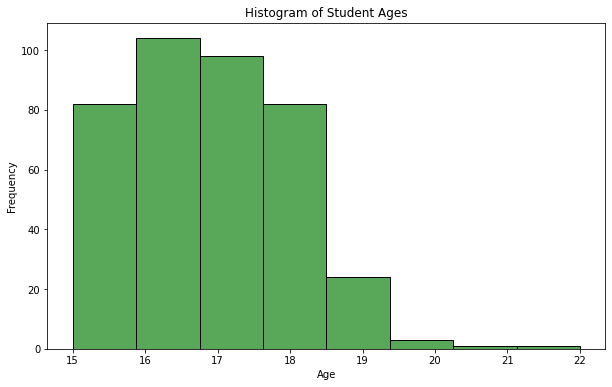

In [5]:
plt.figure(figsize = (10, 6))
sns.histplot(df['age'], bins = 8, kde = False, color = 'forestgreen')
plt.title('Histogram of Student Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


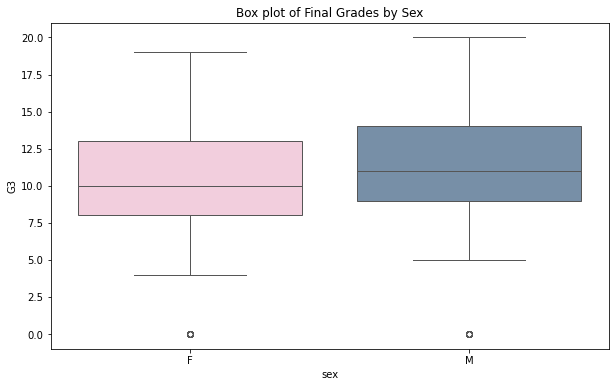

In [6]:
boxplot_colors = ["#F8C8DC", "#6F8FAF"]
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'sex', y = 'G3', hue = 'sex', data = df, palette = boxplot_colors, legend = False)
plt.title('Box plot of Final Grades by Sex')
plt.legend().remove()
plt.show()

Based on this boxplot I've created which shows the distribution of final grades for students, it looks like male students have a slightly higher final grade. 

The line in the middle of each box represents the median grade and it looks like the median final grade for male students is higher.
The box itself shows the IQR and a larger box might indicate greater variability.
The whiskers provide a sense of how spread out the grades are and the black dots at the bottom can indicate outliers.

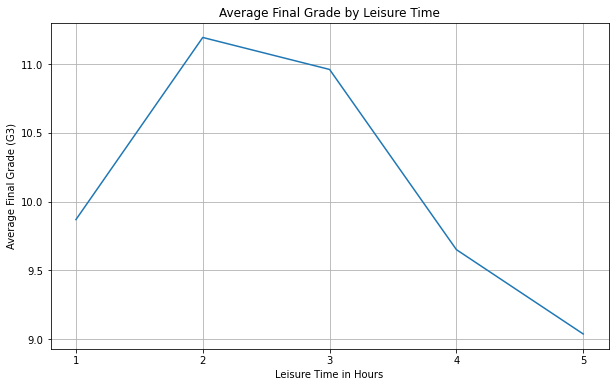

In [7]:
avg_grades_by_leisure = df.groupby('goout')['G3'].mean()

plt.figure(figsize = (10, 6))
avg_grades_by_leisure.plot(kind = 'line')
plt.title('Average Final Grade by Leisure Time')
plt.xlabel('Leisure Time in Hours')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(avg_grades_by_leisure.index)
plt.grid(True)
plt.show()

This line chart quickly shows the relationship between grades and leisurely time that students partake in. It looks like grades increase when students have time to relax which makes sense since it's important to take breaks every often between studying. However, if they engage in leisurely activities for too long, they won't have time to study and that causes their grades to suffer.

# ANOVA Testing

I want to see if the groups of data we have is statistically different between 4 sets of "studytime" variables. In our dataset, "studytime" has four categories (1, 2, 3, 4) and I want to see whether the mean final grade differs significantly across these categories. 1 means a student studied minimal hours and 4 means they studied a lot. In order to do this, I'm going to do some ANOVA testing to compare each group. This is important in our analysis because study time is important to how well students perform. If students' study and they do well, that would show that studying is a good predictor of success.

In [8]:
anova_studytime = stats.f_oneway(
    df['G3'][df['studytime'] == 1],
    df['G3'][df['studytime'] == 2],
    df['G3'][df['studytime'] == 3],
    df['G3'][df['studytime'] == 4])
print(f"ANOVA result for studytime and G3: F={anova_studytime.statistic}, p={anova_studytime.pvalue}")

ANOVA result for studytime and G3: F=1.7278351054436039, p=0.1607228096836598


<Figure size 576x432 with 0 Axes>

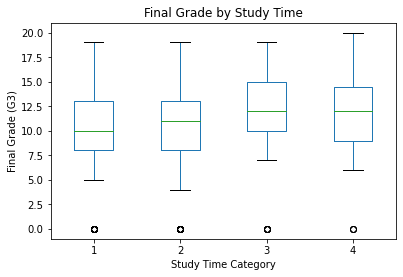

In [9]:
plt.figure(figsize = (8, 6))
df.boxplot('G3', by = 'studytime', grid = False)
plt.title('Final Grade by Study Time')
plt.suptitle('') # Suppress the default title
plt.xlabel('Study Time Category')
plt.ylabel('Final Grade (G3)')
plt.show()

Based on our ANOVA results, it looks like our large F-statistic implies that there is some difference between the group means, but is not large relative to the variance within the groups. Our p-value is greater than the usual common alpha level of 0.05, which means that we do not have enough evidence to reject the null hypothesis. In summary, it looks like there is no statistically significant difference in grades among the different levels of study time which is a bit disappointing since I would think that it's the opposite. It may be possible that there are other factors in play and that just studytime alone is not enough to detect trends. I have also built another boxplot to show the differences in grades based on the aforementioned four categories of studytime.

# Feature Engineering and Regression Model

I am very skeptical about my observation above. Given what we know about studying in the real world, it would be correct to assume that more studytime would lead to better grades. If that wasn't the case, I would have gotten straight As through college with minimal studying. I would have played a lot more computer games if that was the case.

I'm going to build a regression plot with a combination of the traveltime and studytime variables to determine if there is a correlation between academic performance. I want to explore whether a balance of these two items, has a linear relationship with grades.

In my code block below, I've created a new variable called Productivity which is a combination of the traveltime and studytime variables. The coefficients used (1 and 2) are the weights I'm assigned to each time variable. In this exercise, I'm assuming that studytime is weighted more heavily than travel time since I think that's a more important indicator of student performance.

<AxesSubplot:xlabel='Productivity', ylabel='G3'>

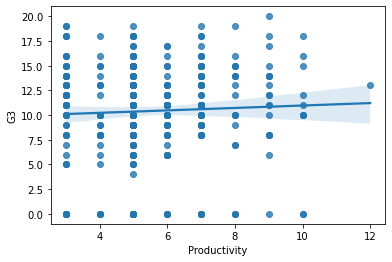

In [10]:
df['Productivity'] = 1 * df['traveltime'] + 2 * df['studytime']
sns.regplot(x ='Productivity', y = 'G3', data = df)

<AxesSubplot:xlabel='traveltime', ylabel='G3'>

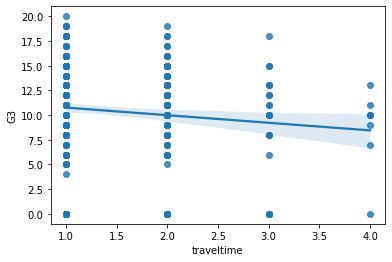

In [11]:
sns.regplot(x = 'traveltime', y = 'G3', data = df)

As expected, students with greater productivity have better grades. These two graphs are much more in line with what expected results are. I've also graphed a chart displaying that the longer a student commutes, the worse their grades are. With a little legwork, we were able to confirm that students who study more receive better grades and that students who travel more receive lower grades.

<AxesSubplot:xlabel='Romantic_Freetime', ylabel='G3'>

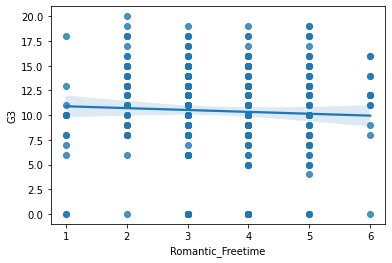

In [12]:
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
df['Romantic_Freetime'] = df['romantic'] + df['freetime']
sns.regplot(x = 'Romantic_Freetime', y = 'G3', data = df)

High school is also a prime time for when teenagers enter relationships for the first time. I was curious about whether or not relationships impact grades and it looks like it does! Being in a relationship can be tough and so there is a lot of time and effort that is needed.

I want to do some regression analysis to understand the relationships between parent status (living together or seperated), quality of family relationship and final grades. This is crucial because studies have shown that students who come from families that are not stable, tend to perform poorly compared to their peers.

In [13]:
df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})

X = df[['Pstatus', 'famrel']]
y = df['G3']
X = sm.add_constant(X)

# Perform regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.214
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.298
Time:                        22:50:22   Log-Likelihood:                -1160.0
No. Observations:                 395   AIC:                             2326.
Df Residuals:                     392   BIC:                             2338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1478      1.228      8.265      0.0

R-squared: Looks very low, suggesting that the model does not explain much variation in final grades

Adjusted R-squared: Similar to above, also very low

Prob (F-statistic): The corresponding p-value is higher than 0.05, which suggests that the data is not statistically significant

Pstatus: This coefficient suggests that there is a decrease of 0.89 points in the ifnal grade when parents are living apart. However, the p-value is also greater than 0.05, indicating that the relationship is not statistically significant.

famrel: This coefficient suggests that for each unit increase in "famrel", the final grade increases by 0.27, but like the one above, is also not statistically significant.

Overall, my regression model seems to suggest that neither "Pstatus" or "famrel" has a statistically significant impact on final grades. This lack of significance is a bit concerning, since I would assume that there is some sort of negative relationship present.

# Conclusion

I worked on this project to explore the relationship between different variables such as relationships, study time, travel time, parent status, etc to understand how these factors impact student grades. It was a great experience doing data analysis on a large dataset to try and validate my hypothesis. In summary, my biggest takeaway was that individual factors seem to contribute less to how students performed. However, if we were to combine different factors, those new variables did show a statistically significant correlation with academic performance. That makes sense because in the real world, students juggle a plethora of situations in their daily life. Whether we're bombarded with family issues or the need to commute to school, these small things eventually do add up.

Although this study was interesting and validated a lot of my beliefs, a limitation of this study is within its limited scope. This dataset included only data from a survey of a students' math class in secondary school. That's data for only one singular class! I would really have liked the opportunity to deep dive into a larger dataset with more classes, more student demographics and more resources which could also play a huge role in student performance.

If I were to work on something like this again in the future, I would want to combine different datasets in order to bridge even more variables. Imagine if I had variables like teacher-student ratio, library time, advanced placement (AP) courses, stress levels, self-esteem, etc. Incorporating these variables into education research can provide a more detailed view into the academic performance world. We can then use that data to come up with policies that can help students reach their academic goals.

This project was really impactful and highlights the many variables that shows what it takes for a student to excel.